In [2]:
from torchvision import transforms,datasets
from torch.utils.data.dataset import Dataset
import torch

import PIL
import numpy as np
import h5py

import subprocess

In [45]:
class SFBD(Dataset):
    
    """
        A custom dataloader for Stanford Background Dataset.
        http://dags.stanford.edu/projects/scenedataset.html
        
        It works after some preprocessing of converting the regions map into one hot encoding\
        form in .h5py format
        
        Authors:
            Dibya Prakash Das
            Sangeet Kumar Mishra
            
    """
    
    def __init__(self,image_path,region_path,transform=None):
        
        """
            image_path : The location of the SBD's images
            region_path : The location of the individual one_hot_encodified ".h5" files
            transform : yet to be implemented
        """
        
        self.image_path = image_path
        self.region_path = region_path
        self.file_list =  subprocess.getoutput("ls "+image_path).split("\n")
        self.len_files = len(self.file_list)
        self.regions = subprocess.getoutput("ls "+region_path).split('\n')
        
    def load_h5py(self,file):
        
        """
            loads a '.h5' file of shape  into a numpy array and returns it. 
        """
        
        with h5py.File("{}{}".format(self.region_path,file),"r") as hf:
            loaded = hf["arr"][:]
        return loaded
        

    
    def __len__(self):
        
        """
            returns the number of files
        """
        return self.len_files        
    
    def __getitem__(self,index):
        
        """
            gives an image and its all classes in one hot encoding form
        """
        
        region = SFBD.load_h5py(self,self.regions[index])
        return {'image':np.array(PIL.Image.open(self.image_path + self.file_list[index])),'region':region}

In [46]:
#instatiate
sf = SFBD(image_path="./images/",region_path="./regions_h5py/")

In [47]:
# access an element by idex
sf[3]

{'image': array([[[ 66,  62,  87],
         [ 55,  51,  76],
         [ 72,  70,  92],
         ..., 
         [ 98,  98,  96],
         [ 97,  97,  95],
         [ 96,  96,  94]],
 
        [[ 63,  59,  84],
         [ 53,  49,  74],
         [ 71,  69,  91],
         ..., 
         [ 92,  92,  90],
         [ 98,  98,  96],
         [103, 103, 101]],
 
        [[ 68,  64,  89],
         [ 55,  53,  75],
         [ 72,  70,  91],
         ..., 
         [ 98,  98,  96],
         [ 67,  67,  65],
         [ 40,  40,  38]],
 
        ..., 
        [[ 62,  62,  64],
         [ 65,  65,  67],
         [ 66,  66,  68],
         ..., 
         [ 69,  69,  69],
         [ 73,  73,  73],
         [ 77,  77,  77]],
 
        [[ 59,  59,  61],
         [ 65,  65,  67],
         [ 69,  69,  71],
         ..., 
         [ 71,  71,  71],
         [ 76,  76,  76],
         [ 82,  82,  82]],
 
        [[ 53,  53,  55],
         [ 62,  62,  64],
         [ 68,  68,  70],
         ..., 
         [ 67,

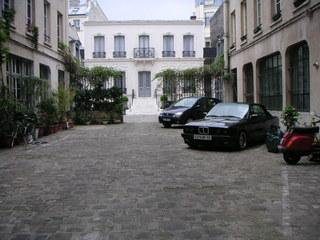

In [48]:
PIL.Image.fromarray(sf[3]['image'])

In [26]:
len(sf)

715

In [27]:
sf.regions[0]

'0000047.regions.txt'

In [28]:
len(sf.regions)

715

In [10]:
sf[2]['labels']

KeyError: 'labels'

In [13]:
sf[2]['region'].shape

(8, 240, 320)

In [125]:
dataset_loader = torch.utils.data.DataLoader(sf,
                                             batch_size=1, shuffle=False,
                                             num_workers=1)

In [128]:
for i in dataset_loader:
    print(i)

{'label': 
( 0 , 0 ,.,.) = 
   1   1   1  ...    0   0   0
   1   1   1  ...    0   0   0
   1   1   1  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 1 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 2 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   1   1   1  ...    1   1   1
   1   1   1  ...    1   1   1
   1   1   1  ...    1   1   1
    ... 

( 0 , 5 ,.,.) = 
   0   0   0  ...    1   1   1
   0   0   0  ...    1   1   1
   0   0   0  ...    1   1   1
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 6 ,.,.) = 
   0   0   0  ...    0 

ValueError: Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 40, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-113-260340424367>", line 57, in __getitem__
    label = SFBD.one_hot_encodify(SFBD.numpify(SFBD.open_file(self.label_path + self.labels[index])))
  File "<ipython-input-113-260340424367>", line 47, in one_hot_encodify
    h = np.reshape(labels_mat,(240*320))
  File "/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py", line 232, in reshape
    return _wrapfunc(a, 'reshape', newshape, order=order)
  File "/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return getattr(obj, method)(*args, **kwds)
ValueError: cannot reshape array of size 68480 into shape (76800,)


In [13]:
a=sf[4]

In [14]:
a

{'image': array([[[237, 241, 240],
         [238, 242, 241],
         [241, 245, 244],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[241, 245, 244],
         [242, 246, 245],
         [245, 249, 248],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[243, 245, 244],
         [243, 245, 244],
         [245, 247, 246],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        ..., 
        [[ 73,  90, 106],
         [ 73,  90, 106],
         [ 74,  91, 107],
         ..., 
         [ 89, 111, 134],
         [ 87, 109, 132],
         [ 85, 107, 130]],
 
        [[ 73,  90, 106],
         [ 74,  91, 107],
         [ 74,  91, 107],
         ..., 
         [ 85, 107, 130],
         [ 84, 106, 129],
         [ 83, 105, 128]],
 
        [[ 69,  86, 102],
         [ 69,  86, 102],
         [ 70,  87, 103],
         ..., 
         [ 82,

In [15]:
type(a)

dict

In [17]:
a.keys()

dict_keys(['image', 'region'])

In [18]:
import pickle as pk

In [20]:
with open("a.d","wb") as f:
    pk.dump(a,f)